In [1]:
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "marimo"])

0

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("test_results_with_caching.csv")
latency_lines = df['latencies']

In [20]:
records = []
for rec in latency_lines:
    data = ast.literal_eval(rec)
    # print(data)
    records.append(data[0])

df_plot = pd.DataFrame(records)
df_plot

,cache_retrieval,prune_0,few_shots_0,gen_t2c_0,get_cypher_query,postprocess_query,validate_query,exec_query,answer_gen,run_query_forward,caching,full_run
0,0.000021,2.666292,0.742325,1.150191,4.559050,0.001452,0.012291,0.002639,0.026810,4.602363,0.000014,4.961822
1,0.000018,2.407855,0.813451,1.129289,4.350736,0.000161,0.013835,0.003419,6.379125,10.747690,0.000021,10.784225
2,0.000010,2.209365,0.511072,1.891343,4.611991,0.000162,0.009234,0.002010,1.901849,6.525321,0.000026,6.567711
3,0.000009,2.221006,0.483459,1.355978,4.060580,0.000200,0.004047,0.001036,0.024377,4.090629,0.000005,4.131920
4,0.000006,3.297035,0.754027,1.496478,5.547644,0.000654,0.007653,0.002148,0.022170,5.580339,0.000004,5.608634
...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027204
76,0.000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023019
77,0.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026245
78,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024364


In [21]:
df_plot = df_plot[['cache_retrieval', 'prune_0', 'few_shots_0', 'gen_t2c_0', 'postprocess_query', 'validate_query', 'exec_query', 'answer_gen', 'caching', 'full_run']]
df_plot.rename(columns={
    'cache_retrieval': 'Cache Retrieval',
    'prune_0': 'Pruning',
    'few_shots_0': 'Few-Shot Prompting',
    'gen_t2c_0': 'Query Generation',
    'postprocess_query': 'Post-process Query',
    'validate_query': 'Validate Query',
    'exec_query': 'Execute Query',
    'answer_gen': 'Answer Generation',
    'caching': 'Caching Insert',
    'rep_t2c_0': 'Repair: Few-Shot Prompting',
    'rep_query_0': 'Repair: Query Generation',
    'rep_postprocess_query_0': 'Repair: Post-process Query',
    'rep_validate_query_0': 'Repair: Validate Query',
    'full_run': 'Full Run'
}, inplace=True)

/var/folders/d3/bzmlqh9x74v07nxbj74dmpcm0000gn/T/ipykernel_22836/3519315088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.rename(columns={


In [11]:
df_plot

,Cache Retrieval,Pruning,Few-Shot Prompting,Query Generation,Post-process Query,Validate Query,Execute Query,Answer Generation,Caching Insert,Full Run
0,0.000021,2.666292,0.742325,1.150191,0.001452,0.012291,0.002639,0.026810,0.000014,4.961822
1,0.000018,2.407855,0.813451,1.129289,0.000161,0.013835,0.003419,6.379125,0.000021,10.784225
2,0.000010,2.209365,0.511072,1.891343,0.000162,0.009234,0.002010,1.901849,0.000026,6.567711
3,0.000009,2.221006,0.483459,1.355978,0.000200,0.004047,0.001036,0.024377,0.000005,4.131920
4,0.000006,3.297035,0.754027,1.496478,0.000654,0.007653,0.002148,0.022170,0.000004,5.608634
...,...,...,...,...,...,...,...,...,...,...
75,0.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027204
76,0.000013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023019
77,0.000014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026245
78,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024364


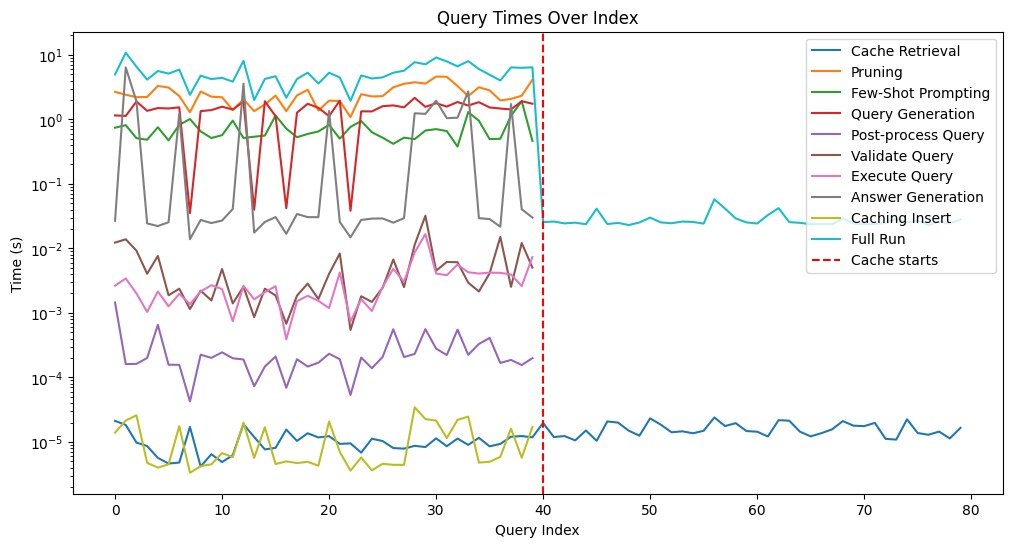

In [13]:
plt.figure(figsize=(12,6))
for col in df.columns[:-1]:  # exclude Cached column
    plt.plot(df.index, df[col], label=col)
    
plt.axvline(len(df)//2, color='red', linestyle='--', label='Cache starts')
plt.yscale('log')
plt.xlabel('Query Index')
plt.ylabel('Time (s)')
plt.title('Query Times Over Index')
plt.legend()
plt.show()

<Figure size 1400x600 with 0 Axes>

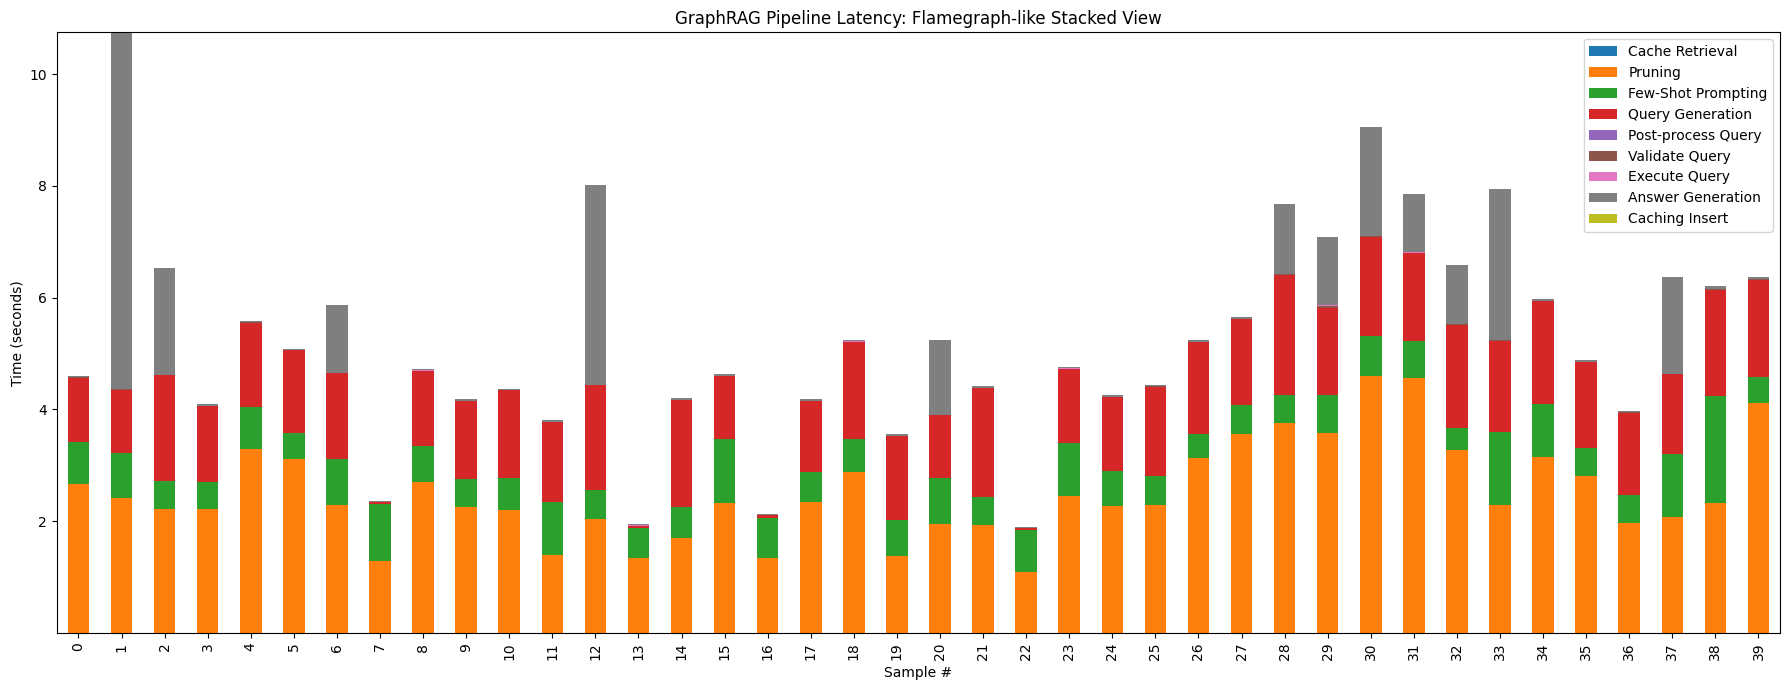

In [23]:
plt.figure(figsize=(14, 6))
df_plot = df_plot[:40]
df_plot = df_plot.drop(columns=['Full Run'])
# Stacked bar plot
df_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 7),
    legend=True
)

plt.xlabel("Sample #")
plt.ylabel("Time (seconds)")
plt.title("GraphRAG Pipeline Latency: Flamegraph-like Stacked View")
plt.tight_layout()
plt.show()

In [15]:
initial_data = pd.read_csv("test_results_initial_pipeline.csv")
latency_lines_initial = initial_data['latencies']
records_initial = []
for rec in latency_lines_initial:
    data = ast.literal_eval(rec)
    records_initial.append(data)

df_initial_plot = pd.DataFrame(records_initial)
df_initial_plot = df_initial_plot[['prune', 'gen_t2c', 'answer_gen']]
df_initial_plot.rename(columns={
    'cache_retrieval': 'Cache Retrieval',
    'prune_0': 'Pruning',
    'few_shots_0': 'Few-Shot Prompting',
    'gen_t2c_0': 'Query Generation',
    'postprocess_query': 'Post-process Query',
    'validate_query': 'Validate Query',
    'exec_query': 'Execute Query',
    'answer_gen': 'Answer Generation',
    'caching': 'Caching Insert',
    'rep_t2c_0': 'Repair: Few-Shot Prompting',
    'rep_query_0': 'Repair: Query Generation',
    'rep_postprocess_query_0': 'Repair: Post-process Query',
    'rep_validate_query_0': 'Repair: Validate Query'
}, inplace=True)

<Figure size 1400x600 with 0 Axes>

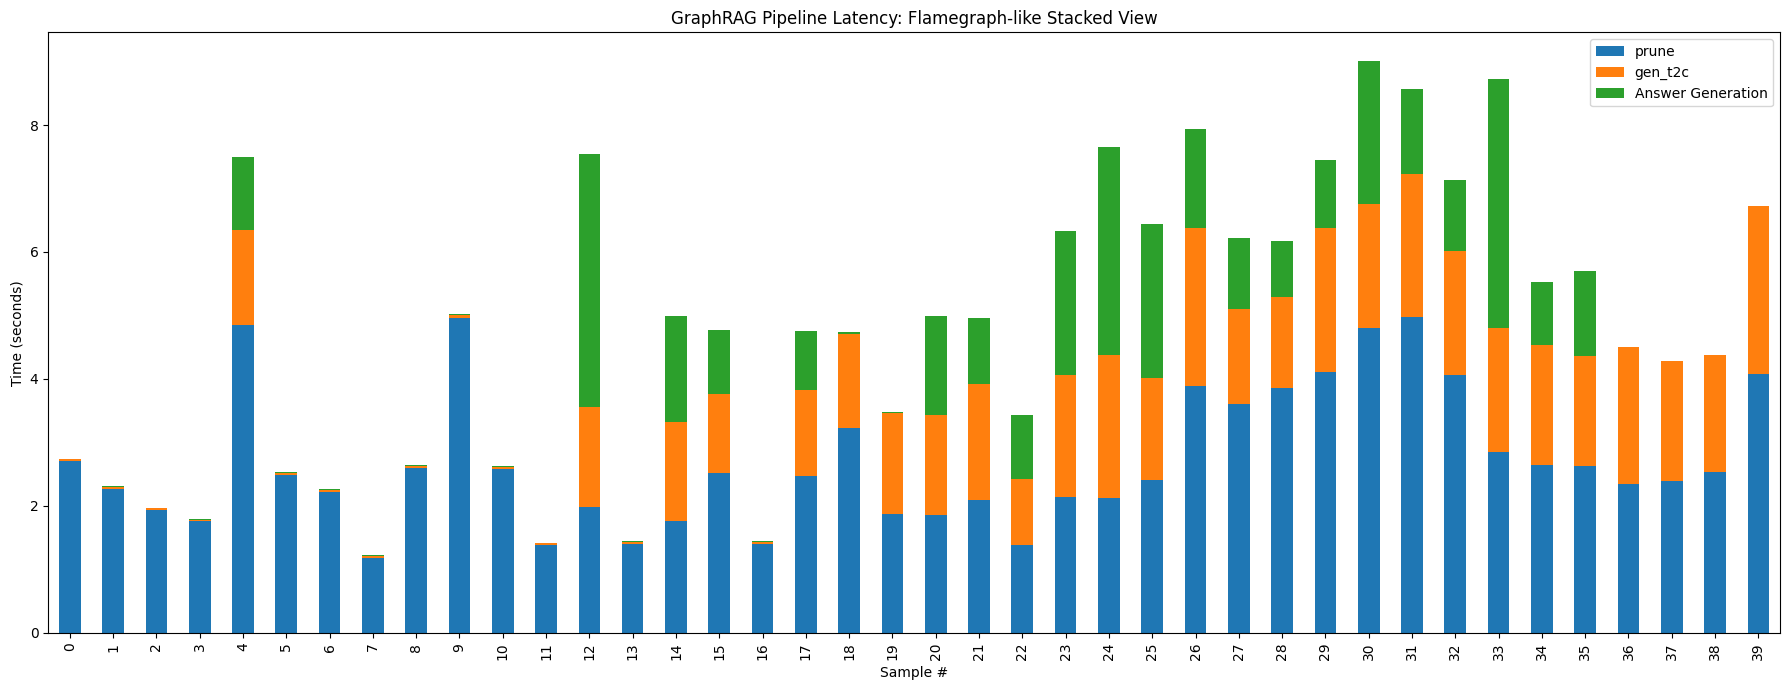

In [16]:
plt.figure(figsize=(14, 6))

# Stacked bar plot
df_initial_plot.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 7),
    legend=True
)

plt.xlabel("Sample #")
plt.ylabel("Time (seconds)")
plt.title("GraphRAG Pipeline Latency: Flamegraph-like Stacked View")
plt.tight_layout()
plt.show()

In [31]:
df_true = pd.read_csv("./generate_examples/nobel_questions_queries.csv")
df_rag = pd.read_csv("test_results_with_caching2.csv")
df_init = pd.read_csv("test_results_initial_pipeline.csv")

df_queries = df_true[['question', 'cypher']]
df_queries['rag_query'] = df_rag['generated_query'][:40]
df_queries['initial_query'] = df_init['generated_query']
df_queries.head()

,question,cypher,rag_query,initial_query
0,Who won the Nobel Prize in Physics in 2020?,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WHERE ...
1,List all Nobel laureates in Chemistry.,MATCH (s:Scholar)-[:WON]->(p:Prize {category: ...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE toLo...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...
2,Which laureates won more than one Nobel Prize?,"MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...","MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...",MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WITH s...
3,Find Nobel laureates born before 1900.,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[r:WON]->(p:Prize) WHERE s.b...
4,What did Marie Curie win?,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.kn...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE lowe...,MATCH (s:Scholar)-[r:WON]->(p:Prize) WHERE toL...


In [32]:
df_queries['rag_matches'] = [0]*len(df_queries)
df_queries['initial_matches'] = [0]*len(df_queries)
df_queries.head()

,question,cypher,rag_query,initial_query,rag_matches,initial_matches
0,Who won the Nobel Prize in Physics in 2020?,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WHERE ...,0,0
1,List all Nobel laureates in Chemistry.,MATCH (s:Scholar)-[:WON]->(p:Prize {category: ...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE toLo...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...,0,0
2,Which laureates won more than one Nobel Prize?,"MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...","MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...",MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WITH s...,0,0
3,Find Nobel laureates born before 1900.,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[r:WON]->(p:Prize) WHERE s.b...,0,0
4,What did Marie Curie win?,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.kn...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE lowe...,MATCH (s:Scholar)-[r:WON]->(p:Prize) WHERE toL...,0,0


In [33]:
df_queries.to_csv("comparison_queries2.csv")

# visualizing accuracy

In [37]:
comp_res = pd.read_csv("./comparison_results.csv")
comp_res.head()

,id,question,gold_query,rag_query,initial_query,gold_result,rag_result,initial_result,rag_matches_gold,initial_matches_gold,gold_error,rag_error,initial_error
0,0,Who won the Nobel Prize in Physics in 2020?,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s:Scholar)-[:WON]->(p:Prize {awardYear:...,MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WHERE ...,"[('Roger Penrose',), ('Reinhard Genzel',), ('A...","[('Roger Penrose',), ('Reinhard Genzel',), ('A...",[],True,False,NaN,NaN,NaN
1,1,List all Nobel laureates in Chemistry.,MATCH (s:Scholar)-[:WON]->(p:Prize {category: ...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE toLo...,MATCH (s:Scholar)-[w:WON]->(p:Prize) WHERE toL...,"[('James B. Sumner',), ('Ronald G.W. Norrish',...","[('Aaron Ciechanover',), ('John B. Goodenough'...","[('Aaron Klug',), ('Ahmed H. Zewail',), ('Alfr...",False,False,NaN,NaN,NaN
2,2,Which laureates won more than one Nobel Prize?,"MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...","MATCH (s:Scholar)-[:WON]->(p:Prize) WITH s, CO...",MATCH (s1:Scholar)-[r1:WON]->(p1:Prize) WITH s...,"[('Marie Curie',), ('Linus Pauling',), ('Frede...","[('Frederick Sanger',), ('K. Barry Sharpless',...","[(66,), (6,), (217,), (222,), (743,)]",True,False,NaN,NaN,NaN
3,3,Find Nobel laureates born before 1900.,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.bi...,MATCH (s:Scholar)-[r:WON]->(p:Prize) WHERE s.b...,"[('Alfred Werner', '1866-12-12'), ('Arthur Har...","[('Alfred Werner', '1866-12-12'), ('Arthur Har...","[('1866-12-12',), ('1865-10-12',), ('1869-02-1...",True,False,NaN,NaN,NaN
4,4,What did Marie Curie win?,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE s.kn...,MATCH (s:Scholar)-[:WON]->(p:Prize) WHERE lowe...,MATCH (s:Scholar)-[r:WON]->(p:Prize) WHERE toL...,"[('physics',), ('chemistry',)]","[('physics', 1903), ('chemistry', 1911)]",[('in recognition of the extraordinary service...,False,False,NaN,NaN,NaN


In [38]:
true_res = comp_res['gold_result']
rag_res = comp_res['rag_result']
init_res = comp_res['initial_result']

for i in range(len(comp_res)):
    print(f"Example {i}:")
    print(f"Gold Result: {true_res[i]}")
    print(f"RAG Result: {rag_res[i]}")
    print(f"Initial Pipeline Result: {init_res[i]}")
    print(f"Rag matches: {comp_res['rag_matches_gold'][i]}, Initial matches: {comp_res['initial_matches_gold'][i]}")
    print("\n")

Example 0:
Gold Result: [('Roger Penrose',), ('Reinhard Genzel',), ('Andrea Ghez',)]
RAG Result: [('Roger Penrose',), ('Reinhard Genzel',), ('Andrea Ghez',)]
Initial Pipeline Result: []
Rag matches: True, Initial matches: False


Example 1:
Gold Result: [('James B. Sumner',), ('Ronald G.W. Norrish',), ('Aaron Ciechanover',), ('John B. Goodenough',), ('Tomas Lindahl',), ('Adolf Butenandt',), ('Alan MacDiarmid',), ('Hermann Staudinger',), ('John E. Walker',), ('Bernard L. Feringa',), ('Victor Grignard',), ('Aziz Sancar',), ('Emil Fischer',), ('George A. Olah',), ('Aaron Klug',), ('Richard R. Ernst',), ('Stefan W. Hell',), ('Stanford Moore',), ('Max F. Perutz',), ('Richard F. Heck',), ('Robert H. Grubbs',), ('Frédéric Joliot',), ('Lord Todd',), ('Roderick MacKinnon',), ('Herbert C. Brown',), ('Morten Meldal',), ('Paul D. Boyer',), ('Richard R. Schrock',), ('Ryoji Noyori',), ('Otto Diels',), ('Walter Gilbert',), ('Henry Taube',), ('Ahmed Zewail',), ('Gerhard Herzberg',), ('Vladimir Prelog'

In [36]:
# Calculate matches
number_of_rag_matches = comp_res['rag_matches_gold'].sum()
number_of_initial_matches = comp_res['initial_matches_gold'].sum()
print(f"Number of RAG matches: {number_of_rag_matches} out of {len(comp_res)}\n Accuracy: {number_of_rag_matches/len(comp_res)}")
print(f"Number of Initial Pipeline matches: {number_of_initial_matches} out of {len(comp_res)}\n Accuracy: {number_of_initial_matches/len(comp_res)}")

Number of RAG matches: 36 out of 40
 Accuracy: 0.9
Number of Initial Pipeline matches: 13 out of 40
 Accuracy: 0.325
